In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import Methods as ms
from Methods import CGT

## Construct CGT Objects (at different T)

In [2]:
#T = 0.1
f = [0, 0.5, 1, 2, 2.2, 2.5, 3, 3.5, 5]
t = 0.1
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT01'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT01'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01 = CGT(f, t, Rgpaths, Reepaths)

In [3]:
#T = 0.3
f = [0, 0.5, 1, 2, 2.5, 3, 4, 5]
t = 0.3
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT03'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT03'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT03 = CGT(f, t, Rgpaths, Reepaths)

In [4]:
#T = 0.5
f = [0, 0.5, 1, 2, 2.5, 3, 5, 7, 10]
t = 0.5
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT05'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT05'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT05 = CGT(f, t, Rgpaths, Reepaths)

In [5]:
#T = 0.75
f = [0, 0.5, 1, 2, 3, 4, 5]
t = 0.75
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT075'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT075'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT075 = CGT(f, t, Rgpaths, Reepaths)

Use temporary mean starting halfway:F = 4.0


In [6]:
#T = 1
f = [0, 0.5, 1, 2, 2.5, 3.5, 5, 7, 10]
t = 1
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT1'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT1'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT1 = CGT(f, t, Rgpaths, Reepaths)

In [7]:
#T = 2
f = [0, 0.5, 1, 2, 5, 7, 10]
t = 2
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT2'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT2'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT2 = CGT(f, t, Rgpaths, Reepaths)

Use temporary mean starting halfway:F = 0.5


In [8]:
#T = 5
f = [0,  0.5, 1, 2, 5, 7, 10]
t = 5
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT5'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT5'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT5 = CGT(f, t, Rgpaths, Reepaths)

In [10]:
#List containing all objects
lsCGTBl50 = [CGT01,CGT03,CGT05,CGT075,CGT1,CGT2,CGT5]
%store lsCGTBl50

forces = ms.lsForces(lsCGTBl50) #Forces that are tested under at least two temperatures
temps = [0.1, 0.3, 0.5, 0.75, 1, 2, 5]

Stored 'lsCGTBl50' (list)


## Graph Equilibirum

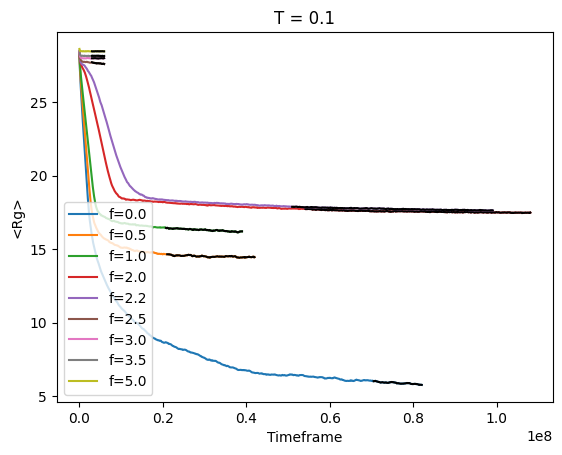

In [11]:
CGT01.Plot('Rg')
# plt.xlim(0,1e7)

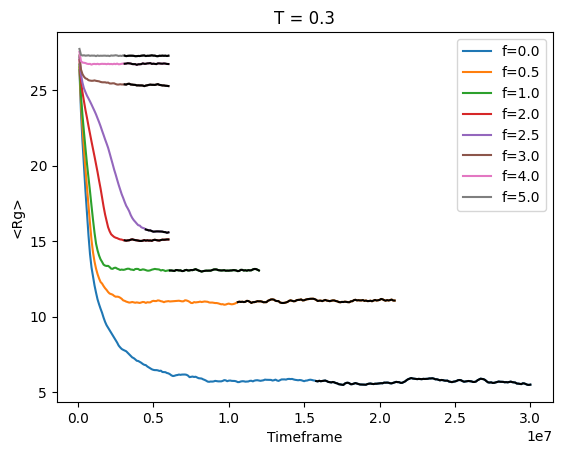

In [12]:
CGT03.Plot('Rg')

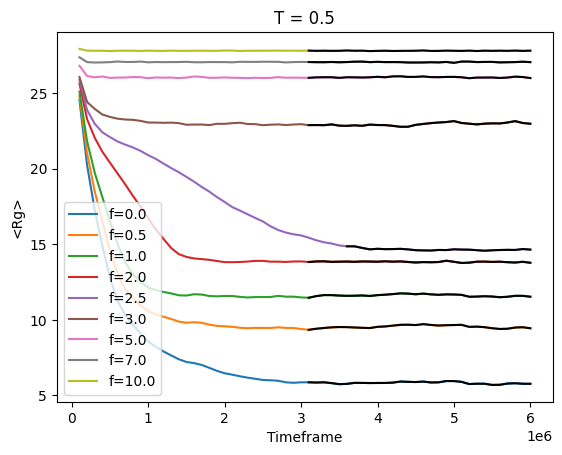

In [13]:
CGT05.Plot('Rg')

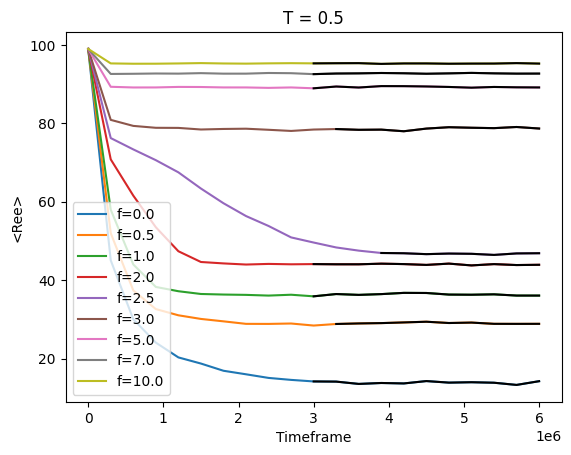

In [14]:
CGT05.Plot('Ree')


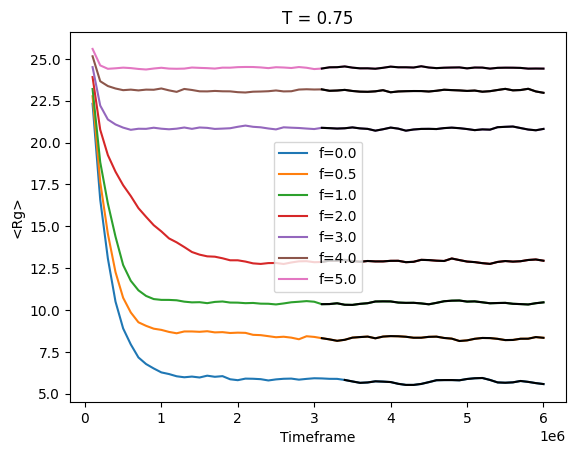

In [15]:
CGT075.Plot('Rg')

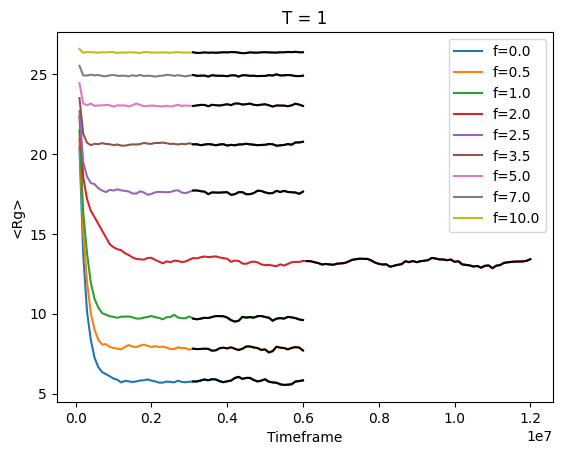

In [16]:
CGT1.Plot('Rg')

## Temperature Extension

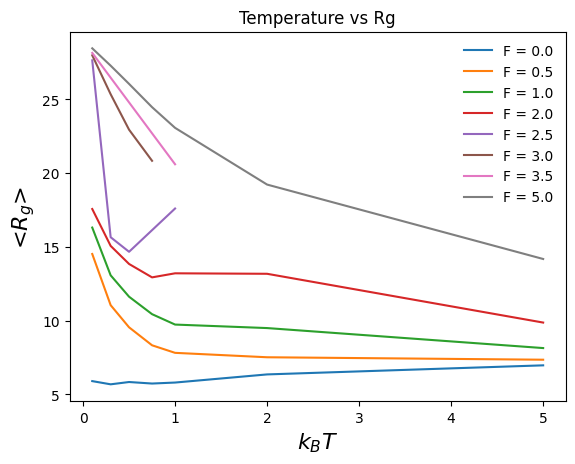

In [17]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl50:
        try:
            i = np.where(cgt.f == f)[0][0]
        except IndexError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRg[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{g}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Rg")
plt.savefig('../Data/Block50/Figures/TvsRg')

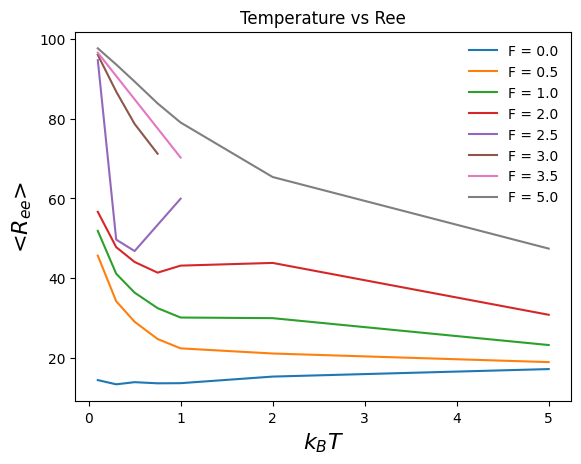

In [18]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl50:
        try:
            i = np.where(cgt.f == f)[0][0]
        except IndexError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRee[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{ee}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Ree")
plt.savefig('../Data/Block50/Figures/TvsRee')

## Force Extension

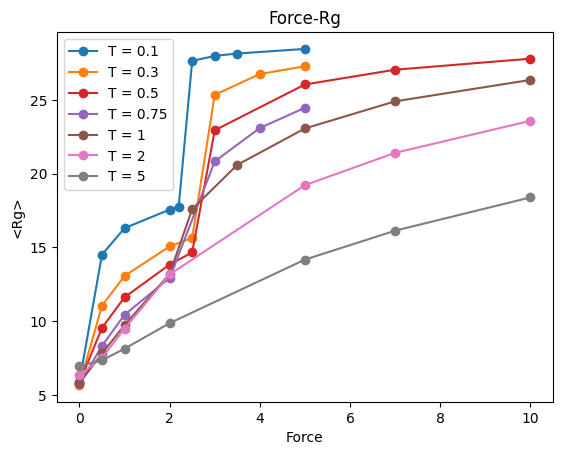

In [19]:
#Rg
for cgt in lsCGTBl50:
    plt.plot(cgt.f, cgt.aveRg, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Rg>')
plt.title('Force-Rg')
plt.savefig('../Data/Block50/Figures/FvsRg')

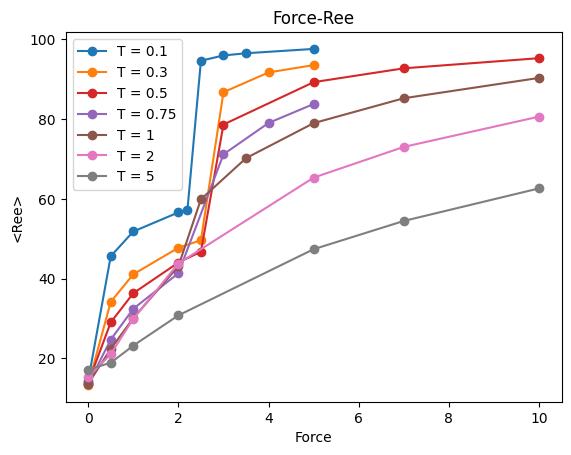

In [20]:
#Ree
for cgt in lsCGTBl50:
    plt.plot(cgt.f, cgt.aveRee, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Ree>')
plt.title('Force-Ree')
plt.savefig('../Data/Block50/Figures/FvsRee')

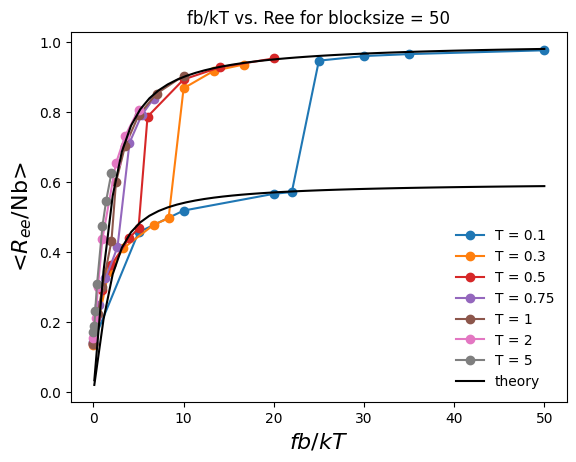

In [21]:
for cgt in lsCGTBl50:
    force = np.array(cgt.f)
    Ree = np.array(cgt.aveRee)
    plt.plot(force / cgt.t, Ree / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

x = np.linspace(0.1, 50)
y = 1 / np.tanh(x) - 1 / x
y2 = y * 3/5
plt.plot(x,y, color = 'k', label = 'theory')
plt.plot(x,y2, color = 'k')

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title("fb/kT vs. Ree for blocksize = 50")
plt.savefig('../Data/Block50/Figures/Fbkt vs Ree')
# plt.xlim(0,10)

Text(0.5, 1.0, 'block50')

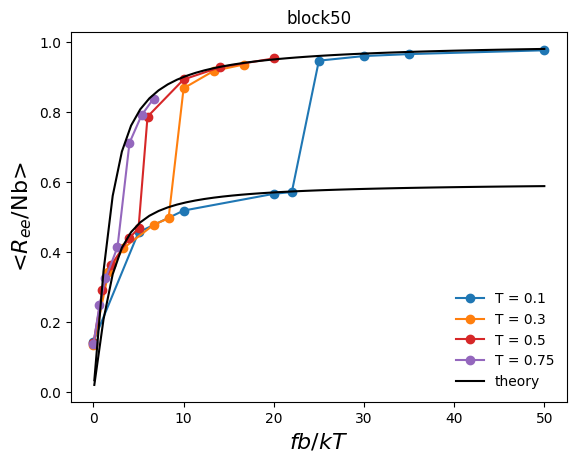

In [22]:
#Below Critical Temperature

for cgt in lsCGTBl50[0:4]:
    force = np.array(cgt.f)
    Ree = np.array(cgt.aveRee)
    plt.plot(force / cgt.t, Ree / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

x = np.linspace(0.1, 50)
y = 1 / np.tanh(x) - 1 / x
y2 = y * 3/5
plt.plot(x,y, color = 'k', label = 'theory')
plt.plot(x,y2, color = 'k')

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title('block50')

Text(0, 0.5, '$fb/kT$')

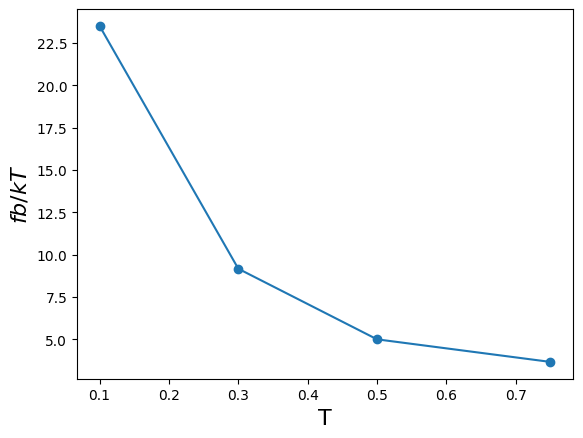

In [23]:
#Graph T vs midpoint fbkT where 1st order transition occurs
T = [0.1, 0.3, 0.5, 0.75]
fbkT = np.array([(2.2 + 2.5) / 0.1, (2.5 + 3) / 0.3, (2 + 3) / 0.5, (2.5 + 3) / 0.75]) / 2

plt.plot(T, fbkT, '-o')
plt.xlabel('T', fontsize = 16)
plt.ylabel('$fb/kT$', fontsize=16)